## Problem Statement
#### Leveraging the customer data collected by Walmart consisting of the Gender, Age, Occupation, City,, Stay_in_current_city_year and  Marital Status to identify characteristics which make the customer  to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions.

#### Understanding if the spending habits differ between male and female customers.
![](file:///c%3A/Users/anura/Microsoft/PROJECT_X/Walmart_Confidence_Interval_CLT/3.PNG)


![](file:///c%3A/Users/anura/Microsoft/PROJECT_X/Walmart_Confidence_Interval_CLT/20210513_092656.jpg)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [2]:
df = pd.read_csv("walmart_data.csv")
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [3]:
df.shape

(550068, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,550068.0,1.003029e+06,1727.591586,1000001.0,1001516.0,1003077.0,1004478.0,1006040.0
Occupation,550068.0,8.076707e+00,6.522660,0.0,2.0,7.0,14.0,20.0
Marital_Status,550068.0,4.096530e-01,0.491770,0.0,0.0,0.0,1.0,1.0
Product_Category,550068.0,5.404270e+00,3.936211,1.0,1.0,5.0,8.0,20.0
Purchase,550068.0,9.263969e+03,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


In [6]:
df.describe(include="object").T

,count,unique,top,freq
Product_ID,550068,3631,P00265242,1880
Gender,550068,2,M,414259
Age,550068,7,26-35,219587
City_Category,550068,3,B,231173
Stay_In_Current_City_Years,550068,5,1,193821


In [7]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [8]:
df.Gender.value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

In [9]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [10]:
df.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

In [11]:
for i in df.columns:
    print(i , " : ", df[i].nunique() )

User_ID  :  5891
Product_ID  :  3631
Gender  :  2
Age  :  7
Occupation  :  21
City_Category  :  3
Stay_In_Current_City_Years  :  5
Marital_Status  :  2
Product_Category  :  20
Purchase  :  18105


In [12]:
for i in df.columns:
    print(i ," : ", df[i].unique())

User_ID  :  [1000001 1000002 1000003 ... 1004113 1005391 1001529]
Product_ID  :  ['P00069042' 'P00248942' 'P00087842' ... 'P00370293' 'P00371644'
 'P00370853']
Gender  :  ['F' 'M']
Age  :  ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
Occupation  :  [10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]
City_Category  :  ['A' 'C' 'B']
Stay_In_Current_City_Years  :  ['2' '4+' '3' '1' '0']
Marital_Status  :  [0 1]
Product_Category  :  [ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9 20 19]
Purchase  :  [ 8370 15200  1422 ...   135   123   613]


## Outliers

<AxesSubplot:xlabel='Occupation'>

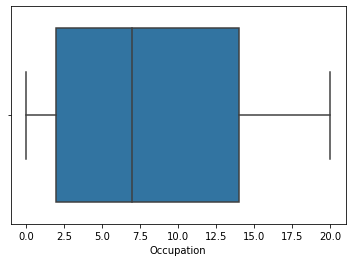

In [13]:
sns.boxplot(x = df['Occupation'])


<AxesSubplot:xlabel='Product_Category'>

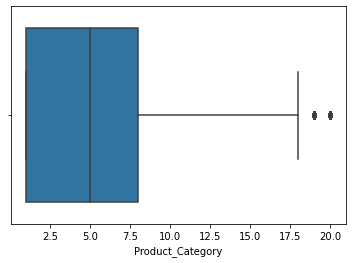

In [14]:
sns.boxplot(x = df['Product_Category'])

<AxesSubplot:xlabel='Purchase'>

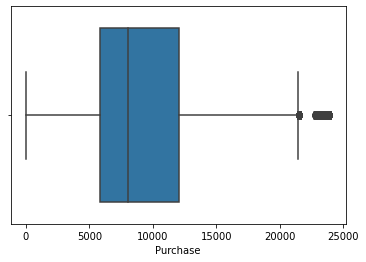

In [15]:
sns.boxplot(x = df["Purchase"])

<AxesSubplot:xlabel='Occupation'>

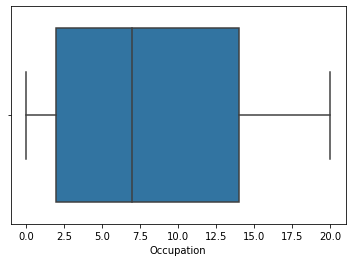

In [16]:
sns.boxplot(x=df["Occupation"])

In [17]:
### Outlier removal from Purchase column
p_25 = df["Purchase"].quantile(0.25)
p_75 = df["Purchase"].quantile(0.75)
print(p_25,p_75)
iqr = p_75- p_25
print(iqr)
lower = p_25 - 1.5*iqr
upper = p_75 + 1.5*iqr
df_iqr = df[((df["Purchase"] > lower) & (df["Purchase"]< upper))]
print(len(df_iqr)/len(df)*100)

5823.0 12054.0
6231.0
99.51333289702364


In [18]:

df = df_iqr
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,547391.0,1.003028e+06,1727.356809,1000001.0,1001516.0,1003075.0,1004478.0,1006040.0
Occupation,547391.0,8.074627e+00,6.521586,0.0,2.0,7.0,14.0,20.0
Marital_Status,547391.0,4.094861e-01,0.491739,0.0,0.0,0.0,1.0,1.0
Product_Category,547391.0,5.378945e+00,3.927383,1.0,1.0,5.0,8.0,20.0
Purchase,547391.0,9.195627e+03,4938.872953,12.0,5721.0,8038.0,12019.0,21399.0


#### Checking value count of Categorical columns

In [19]:
df["Gender"].value_counts(normalize=True)*100

M    75.297365
F    24.702635
Name: Gender, dtype: float64

75% individuals are males

In [20]:
df["Age"].value_counts(normalize=True)*100

26-35    39.946035
36-45    19.987358
18-25    18.146809
46-50     8.301561
51-55     6.976914
55+       3.895205
0-17      2.746117
Name: Age, dtype: float64

60% people lie between [26-45] age group. So the popluation is middle aged

In [21]:
df["Occupation"].value_counts(normalize=True)*100

4     13.160611
0     12.661882
7     10.755566
1      8.617971
17     7.280902
20     6.093451
12     5.662315
14     4.964093
2      4.829272
16     4.612973
6      3.701376
3      3.209406
10     2.354441
5      2.216514
15     2.207928
11     2.100875
19     1.536744
13     1.400644
18     1.204806
9      1.146895
8      0.281335
Name: Occupation, dtype: float64

45% of the individulas are in either occupation 4, 0, 7 or 1

In [22]:
np.round(df['City_Category'].value_counts()/len(df)*100,1)


B    42.0
C    31.1
A    26.9
Name: City_Category, dtype: float64

42% people live in cityB and only 26.9% people live in cityA

In [23]:
np.round(df['Stay_In_Current_City_Years'].value_counts(normalize=True)*100, 1)


1     35.2
2     18.5
3     17.3
4+    15.4
0     13.5
Name: Stay_In_Current_City_Years, dtype: float64

35.2% of people are stay in their current city for 1-2 year. So attrition rate of city is very high.
Only 15.4% of people are living in their city for more than 4 years

In [24]:
np.round(df["Marital_Status"].value_counts(normalize=True)*100,1)

0    59.1
1    40.9
Name: Marital_Status, dtype: float64

59.1% of individuals are Unmarried.

[]

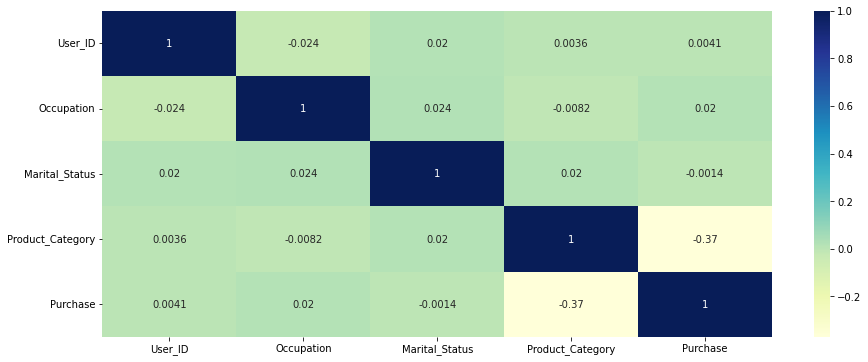

In [25]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),cmap="YlGnBu", annot=True)
plt.plot()

**Noteworthy Points**
1) There is no correlation between Age and any other column
2) There is negative correlation between Purchase and Product_Category

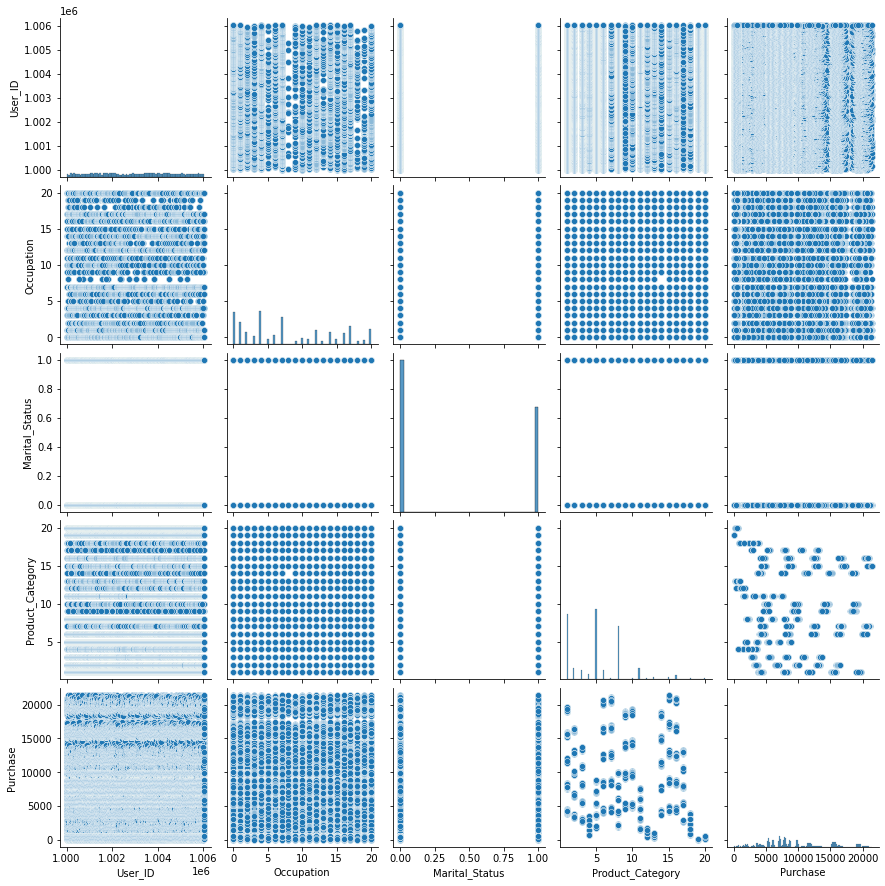

In [26]:
sns.pairplot(df)

#### Scatterplots for Analysis of Continuous Variables -

<AxesSubplot:xlabel='Product_ID', ylabel='Purchase'>

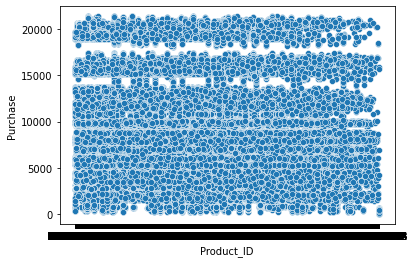

In [27]:
sns.scatterplot(x= 'Product_ID', y= "Purchase", data = df)

#### Analysis of Categorical Columns 

C:\Users\anura\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


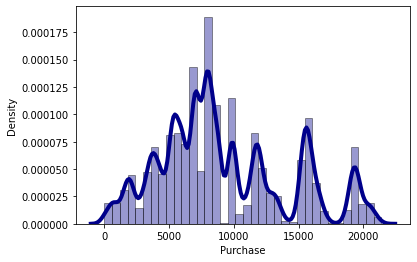

In [28]:
sns.distplot(df['Purchase'], hist=True, kde=True, 
bins=int(36), color = 'darkblue', 
hist_kws={'edgecolor':'black'},
kde_kws={'linewidth': 4})
plt.show()

Purchase by people are normally distributed with some outliers.

C:\Users\anura\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


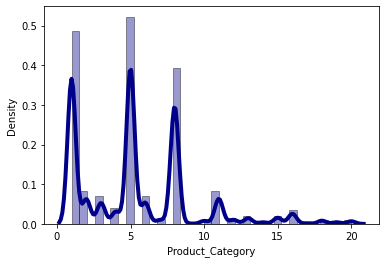

In [29]:
sns.distplot(df['Product_Category'], hist=True, kde=True, 
bins=int(36), color = 'darkblue', 
hist_kws={'edgecolor':'black'},
kde_kws={'linewidth': 4})
plt.show()

<AxesSubplot:xlabel='Product_Category', ylabel='count'>

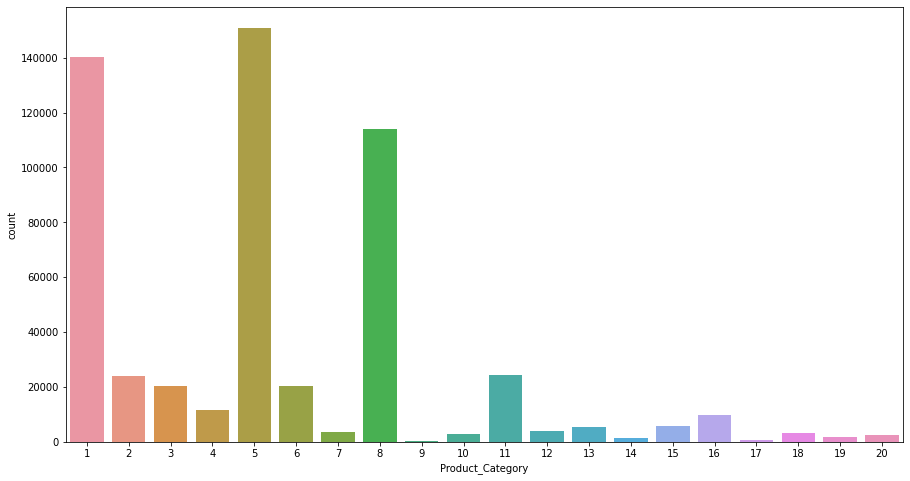

In [35]:
plt.figure(figsize=(15,8))
sns.countplot(x=df["Product_Category"].sort_values(ascending=False), data= df)

<AxesSubplot:title={'center':'Count of Product Category based on Purchase done'}, xlabel='Product_Category', ylabel='count'>

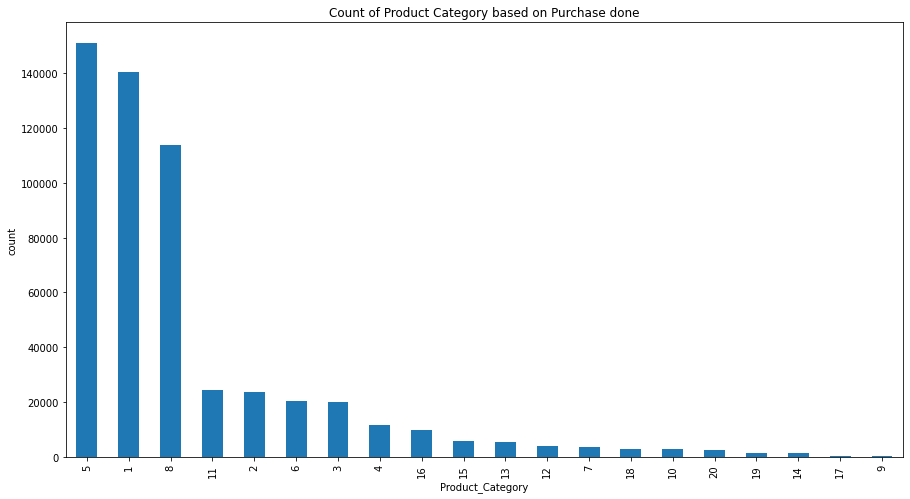

In [55]:
from matplotlib.pyplot import figure, ylabel


df_Product_category = df.groupby(["Product_Category"])["Purchase"].count().sort_values(ascending=False)
# sns.barplot(x=Product_Category, data= df_Product_category)
df_Product_category.plot(kind= "bar", figsize= (15,8), title= "Count of Product Category based on Purchase done",ylabel= "count")


Demand for product_category 1, 5 and 8 are very high.

<AxesSubplot:xlabel='Age', ylabel='count'>

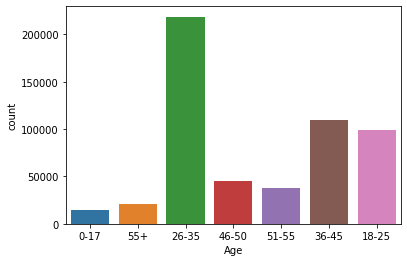

In [291]:
sns.countplot(x=df["Age"], data= df)

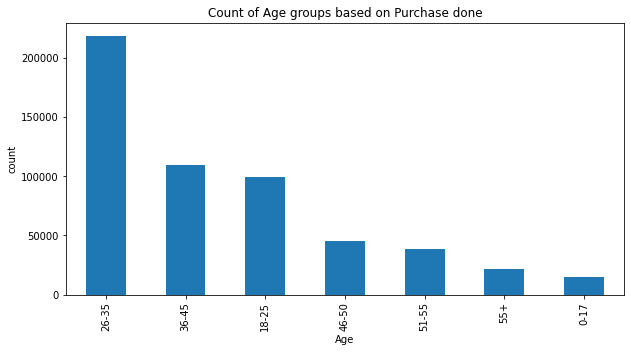

In [98]:
df.groupby(["Age"])["Purchase"].count().sort_values(ascending=False).plot(kind="bar", figsize=(10,5), title= "Count of Age groups based on Purchase done",ylabel= "count")
plt.show()


Yound Individuals are purchasing the most.

<AxesSubplot:xlabel='Gender', ylabel='count'>

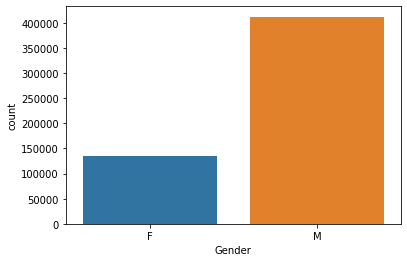

In [292]:
sns.countplot(x=df["Gender"], data= df)

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

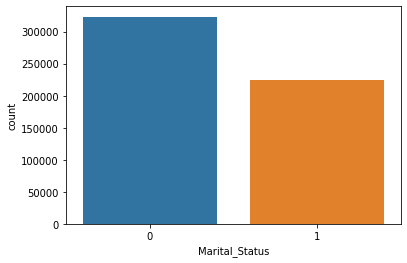

In [293]:
sns.countplot(x=df["Marital_Status"], data= df)

<AxesSubplot:xlabel='Occupation', ylabel='count'>

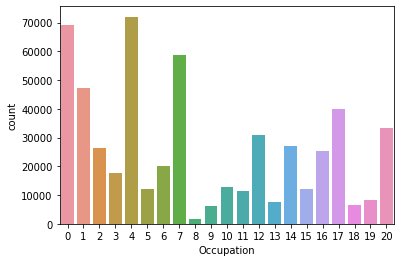

In [294]:
sns.countplot(x=df["Occupation"], data= df)

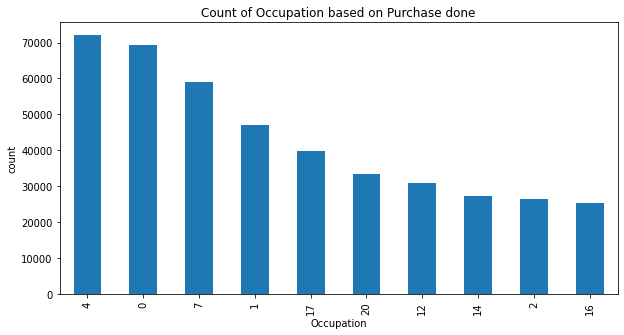

In [97]:
df.groupby(["Occupation"])["Purchase"].count().sort_values(ascending=False)[:10].plot(kind= "bar", figsize= (10,5), title= "Count of Occupation based on Purchase done", ylabel= "count")
plt.show()

<AxesSubplot:xlabel='City_Category', ylabel='count'>

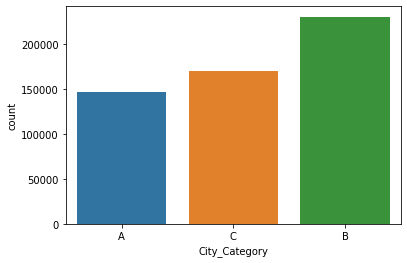

In [295]:
sns.countplot(x=df["City_Category"], data= df)

Population is max for for city B and minimum for city A

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

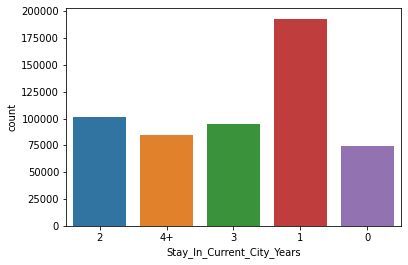

In [296]:
sns.countplot(x=df["Stay_In_Current_City_Years"], data= df)

<AxesSubplot:title={'center':'Relationshop between Stay_In_City_Years and Purchase'}, xlabel='Stay_In_Current_City_Years', ylabel='count'>

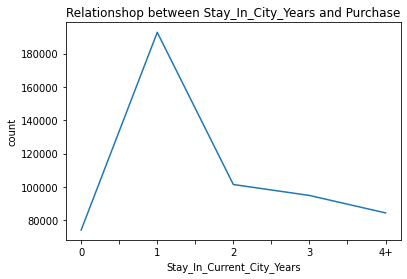

In [71]:
df.groupby(["Stay_In_Current_City_Years"])["Purchase"].count().plot(kind= "line",title= "Relationshop between Stay_In_City_Years and Purchase", ylabel = "count")

## Bivariate Plots

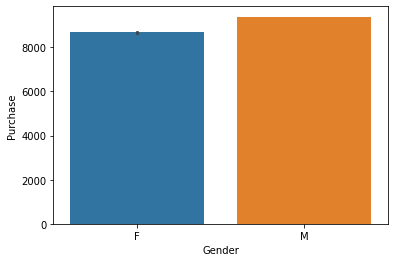

In [382]:
sns.barplot(x= "Gender", y = "Purchase", data = df)
plt.show()

<AxesSubplot:title={'center':'Purchase according to Gender and Product_Category'}, xlabel='Product_Category,Gender'>

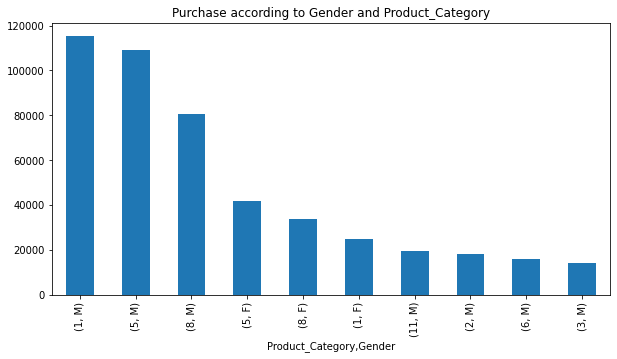

In [95]:
df.groupby(["Product_Category",'Gender'])['Purchase'].count().sort_values(ascending= False)[:10].plot(kind= 'bar',figsize= (10,5), title= 'Purchase according to Gender and Product_Category')

<AxesSubplot:xlabel='Gender,Product_Category'>

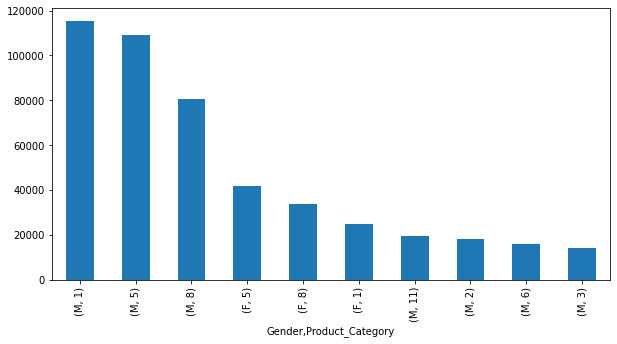

In [96]:
df.groupby(['Gender', "Product_Category"])["Purchase"].count().sort_values(ascending=False)[:10].plot(kind= "bar",figsize= (10,5))

Although Female are only 25% but thier Purachase amount is comparable with Males 

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

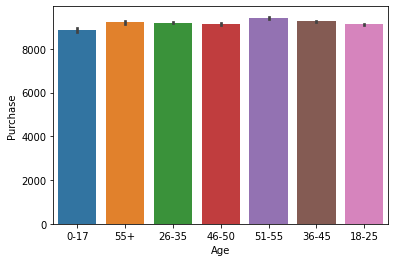

In [383]:
sns.barplot(x= "Age", y = "Purchase", data = df)

<AxesSubplot:xlabel='Product_Category,Age'>

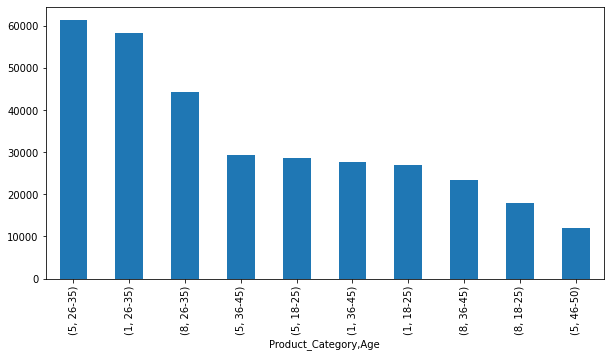

In [100]:
 # Product_Category, Age and Purchase 
 
df.groupby(["Product_Category","Age"]).count()["Purchase"].sort_values(ascending=False)[0:10,].plot(kind="bar", figsize = (10,5)) 

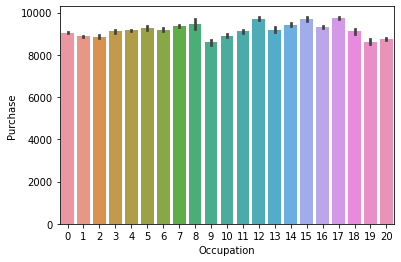

In [384]:
sns.barplot(x= "Occupation", y = "Purchase", data = df)
plt.show()

<AxesSubplot:xlabel='Product_Category,Occupation'>

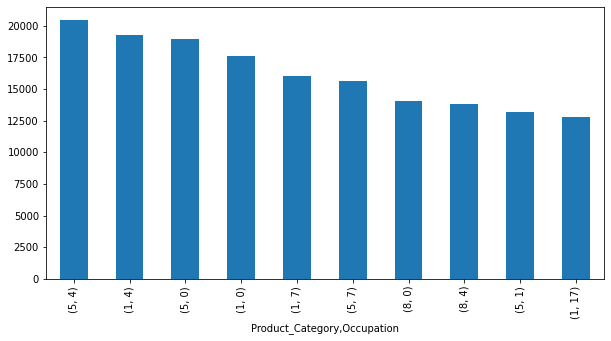

In [107]:
# Product_Category, Occupation and Purchase 
 
df.groupby(["Product_Category","Occupation"]).count()["Purchase"].sort_values(ascending=False)[0:10].plot(kind="bar",figsize= (10,5) )

There is almost equal purchase amount among all occupations

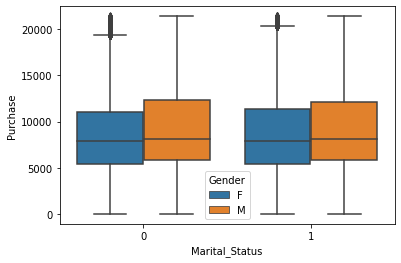

In [396]:
sns.boxplot(x= "Marital_Status", y = "Purchase",hue="Gender" ,data = df)
plt.show()

Unmarried men are spending the most.

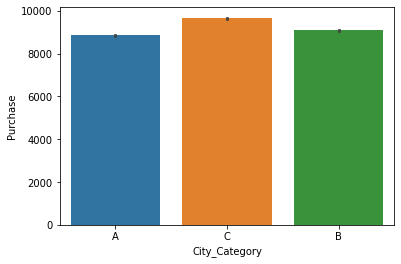

In [391]:
sns.barplot(x= "City_Category", y = "Purchase", data = df)
plt.show()

<AxesSubplot:xlabel='City_Category,Product_Category'>

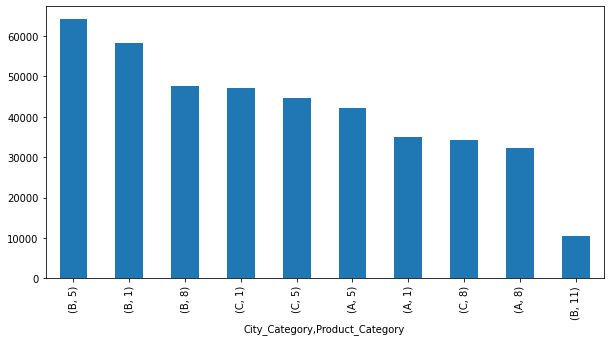

In [109]:
# Product_Category, Occupation and Purchase 
 
df.groupby(["City_Category","Product_Category"]).count()["Purchase"].sort_values(ascending=False)[0:10,].plot(kind=
"bar", figsize= (10,5)) 

People in city C are purchasing on higher amount

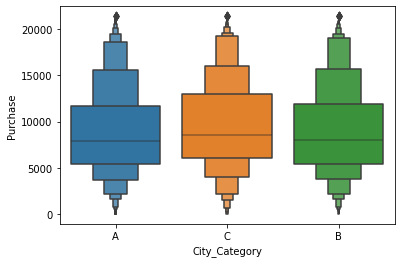

In [388]:
sns.boxenplot(x= "City_Category", y = "Purchase", data = df)
plt.show()

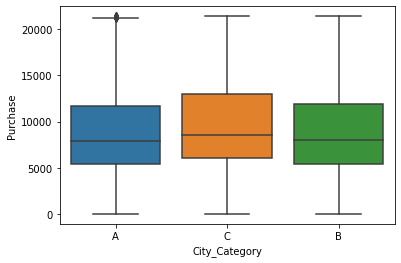

In [389]:
sns.boxplot(x= "City_Category", y = "Purchase", data = df)
plt.show()

<AxesSubplot:xlabel='Stay_In_Current_City_Years,Product_Category'>

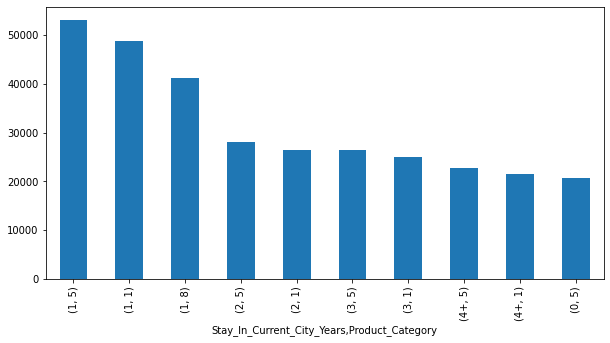

In [111]:
 # Product_Category, Occupation and Purchase 
 
df.groupby(["Stay_In_Current_City_Years","Product_Category"]).count()["Purchase"].sort_values(ascending=False)[0:10
,].plot(kind="bar", figsize= (10,5))

Median purchase of city C is max than other cities

#### Tracking the amount spent per transaction of all the 50 million female customers, and all the 50 million male customers, calculate the average, and conclude the results.

In [113]:
df_male = df[df['Gender'] == "M"]
df_male

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686
...,...,...,...,...,...,...,...,...,...,...
550057,1006023,P00370853,M,26-35,0,C,2,1,19,61
550058,1006024,P00372445,M,26-35,12,A,0,1,20,121
550060,1006026,P00371644,M,36-45,6,C,1,1,20,494
550062,1006032,P00372445,M,46-50,7,A,3,0,20,473


In [114]:
df_female= df[df["Gender"] == 'F']
df_female

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
14,1000006,P00231342,F,51-55,9,A,1,0,5,5378
...,...,...,...,...,...,...,...,...,...,...
550061,1006029,P00372445,F,26-35,1,C,1,1,20,599
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


**Overall Average Purchase**


In [115]:
df["Purchase"].mean()

9195.62719518589

In [116]:
# Avg Female Purchase
df_female["Purchase"].mean()

8671.049038603756

In [117]:
# Avg Male Purchase
df_male["Purchase"].mean()

9367.724354697444

In [170]:
# Taking samples for the data
num_samples = 10000
num_repititions = 1000
collect_sample_means_male = []
for rep in range(num_repititions):
    df_male_sample = df_male["Purchase"].sample(num_samples).mean()
    collect_sample_means_male.append(df_male_sample)


collect_sample_means_male

[9364.626,
 9379.1436,
 9337.2054,
 9344.6372,
 9404.2755,
 9379.8628,
 9330.9536,
 9427.1777,
 9318.5374,
 9377.7022,
 9386.2355,
 9386.9725,
 9298.6483,
 9355.7282,
 9332.3013,
 9261.5543,
 9327.7734,
 9289.75,
 9342.7209,
 9314.6621,
 9327.9288,
 9374.9527,
 9414.6258,
 9368.119,
 9365.4651,
 9361.8564,
 9344.1736,
 9329.6187,
 9303.3563,
 9286.0874,
 9391.8249,
 9417.5038,
 9308.8037,
 9380.4567,
 9301.0735,
 9354.7681,
 9437.2596,
 9434.9131,
 9360.2642,
 9405.2617,
 9374.2186,
 9320.7394,
 9361.8196,
 9358.0991,
 9300.9627,
 9385.4622,
 9336.2489,
 9390.3288,
 9387.1296,
 9358.0266,
 9355.3016,
 9404.7734,
 9416.6126,
 9373.3091,
 9402.3484,
 9316.3664,
 9308.785,
 9339.8226,
 9377.7232,
 9399.0786,
 9326.3353,
 9389.4465,
 9358.8262,
 9360.8845,
 9356.6676,
 9326.811,
 9342.6686,
 9457.8113,
 9246.2792,
 9406.4119,
 9334.896,
 9271.7646,
 9338.4826,
 9344.0366,
 9294.8809,
 9420.2159,
 9401.5375,
 9258.942,
 9438.7894,
 9383.0356,
 9275.0052,
 9303.7907,
 9419.9447,
 9366.3917,


In [171]:
mean_male = np.mean(collect_sample_means_male)
mean_male

9366.944612

In [172]:
std_male = np.std(collect_sample_means_male)
std_male

49.69265259209667

<AxesSubplot:ylabel='Count'>

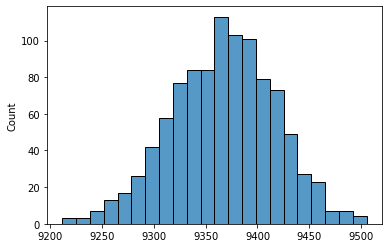

In [173]:
sns.histplot(collect_sample_means_male)

In [177]:
# Taking samples for the data
num_samples = 10000
num_repititions = 1000
collect_sample_means_female = []
for rep in range(num_repititions):
    df_female_sample = df_female["Purchase"].sample(num_samples).mean()
    collect_sample_means_female.append(df_female_sample)


collect_sample_means_female

[8653.7973,
 8649.2317,
 8689.5242,
 8703.0331,
 8669.3175,
 8673.1255,
 8665.6281,
 8697.8809,
 8638.9229,
 8699.1411,
 8667.1051,
 8726.9297,
 8655.9224,
 8719.0649,
 8741.94,
 8600.4214,
 8610.7609,
 8663.3284,
 8661.6917,
 8653.7315,
 8697.3778,
 8691.3793,
 8599.6879,
 8702.0351,
 8642.8161,
 8650.25,
 8659.7638,
 8751.0524,
 8600.5465,
 8623.8246,
 8678.6922,
 8670.5526,
 8645.0853,
 8652.5902,
 8662.8373,
 8635.8985,
 8701.8774,
 8704.4188,
 8661.4987,
 8728.337,
 8677.1055,
 8696.3589,
 8600.6639,
 8664.4978,
 8718.3532,
 8640.4577,
 8762.3464,
 8641.7525,
 8656.4857,
 8618.5456,
 8670.4113,
 8754.0905,
 8670.2469,
 8631.7214,
 8664.4567,
 8780.3555,
 8748.641,
 8702.5987,
 8712.4498,
 8587.4914,
 8587.9009,
 8693.4986,
 8726.6489,
 8637.6167,
 8726.2204,
 8711.1258,
 8791.0953,
 8618.147,
 8652.17,
 8737.1391,
 8702.9363,
 8653.4189,
 8633.0032,
 8692.154,
 8660.2949,
 8636.6173,
 8627.0126,
 8738.8024,
 8663.2775,
 8605.4198,
 8651.4123,
 8650.6135,
 8645.9801,
 8641.7377,
 8

In [178]:
mean_female = np.mean(collect_sample_means_female)
mean_female

8671.491413799999

In [179]:
std_female = np.std(collect_sample_means_female)
std_female

44.998197697474396

<AxesSubplot:ylabel='Count'>

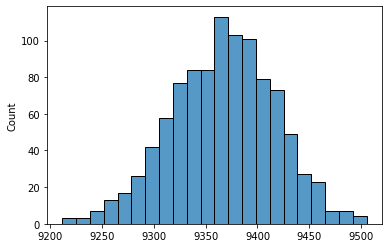

In [180]:
sns.histplot(collect_sample_means_male)

In [181]:
np.round((9368-8671)/9368,3)*100


7.3999999999999995

### Are women spending more money per transaction than men? Why or Why not? 
Average male spend $9368 while avg female spends $8671. So female spend 7.4% less than male.
Since more price consious so they are spending less than the male.

#### Range for spending for male  using CLT

In [182]:
# Range for spending for male using CLT
confidence_level = [.90,.95,.99]
two_tail_confidence_level = confidence_level + (np.array([1,1,1])-confidence_level)/2

print(two_tail_confidence_level)
z = stats.norm.ppf(two_tail_confidence_level).round(2)
z

[0.95  0.975 0.995]


array([1.64, 1.96, 2.58])

In [183]:
male_data_100 = df_male.sample(n = 100)
male_data_1000 = df_male.sample(n = 1000)
male_data_10000 = df_male.sample(n = 10000)
male_data_100000 = df_male.sample(n = 100000)


std_male_100 = male_data_100['Purchase'].std()
std_male_1000 = male_data_1000['Purchase'].std()
std_male_10000 = male_data_10000['Purchase'].std()
std_male_100000 = male_data_100000['Purchase'].std()
print("Std of Male with 100 samples is",std_male_100)
print("Std of Male with 1000 samples is",std_male_1000)
print("Std of Male with 10000 samples is",std_male_10000)
print("Std of Male with 100000 samples is",std_male_100000)


Std of Male with 100 samples is 5101.737267942275
Std of Male with 1000 samples is 5047.630572572856
Std of Male with 10000 samples is 4943.856098588375
Std of Male with 100000 samples is 5000.947479240061


In [184]:
mean_male_100 = male_data_100["Purchase"].mean()
mean_male_1000 = male_data_1000["Purchase"].mean()
mean_male_10000 = male_data_10000["Purchase"].mean()
mean_male_100000 = male_data_100000["Purchase"].mean()
print("Mean of Male with 100 samples is",mean_male_100)
print("Mean of Male with 1000 samples is",mean_male_1000)
print("Mean of Male with 10000 samples is",mean_male_10000)
print("Mean of Male with 100000 samples is ",mean_male_100000)

Mean of Male with 100 samples is 8794.02
Mean of Male with 1000 samples is 9560.135
Mean of Male with 10000 samples is 9331.9017
Mean of Male with 100000 samples is  9356.57141


In [185]:
margin_of_error_male_100 = z*std_male_100/np.sqrt(len(male_data_100))
margin_of_error_male_1000 = z*std_male_1000/np.sqrt(len(male_data_1000))
margin_of_error_male_10000 = z*std_male_10000/np.sqrt(len(male_data_10000))
margin_of_error_male_100000 = z*std_male_100000/np.sqrt(len(male_data_100000))
print("Margin of error for male with 100 samples is",np.round(margin_of_error_male_100))
print("Margin of error for male with 1000 samples is",np.round(margin_of_error_male_1000))
print("Margin of for male error with 10000 samples is",np.round(margin_of_error_male_10000))
print("Margin of errorfor male  with 100000 samples is",np.round(margin_of_error_male_100000))

Margin of error for male with 100 samples is [ 837. 1000. 1316.]
Margin of error for male with 1000 samples is [262. 313. 412.]
Margin of for male error with 10000 samples is [ 81.  97. 128.]
Margin of errorfor male  with 100000 samples is [26. 31. 41.]


In [186]:
upper_male_avg_100 = np.round(mean_male_100 + margin_of_error_male_100, 2)
lower_male_avg_100 = np.round(mean_male_100 - margin_of_error_male_100, 2)
cnt = 0
for i in list(zip(lower_male_avg_100, upper_male_avg_100)):
    print("with 100 Male samples, Range for", confidence_level[cnt]*100, "% confidence Interval is ", i )
    cnt += 1


with 100 Male samples, Range for 90.0 % confidence Interval is  (7957.34, 9630.7)
with 100 Male samples, Range for 95.0 % confidence Interval is  (7794.08, 9793.96)
with 100 Male samples, Range for 99.0 % confidence Interval is  (7477.77, 10110.27)


In [187]:
upper_male_avg_1000 = np.round(mean_male_1000 + margin_of_error_male_1000, 2)
lower_male_avg_1000 = np.round(mean_male_1000 - margin_of_error_male_1000, 2)
cnt = 0
for i in list(zip(lower_male_avg_1000, upper_male_avg_1000)):
    print("with 1000 Male samples, Range for", confidence_level[cnt]*100, "% confidence Interval is ", i )
    cnt += 1

with 1000 Male samples, Range for 90.0 % confidence Interval is  (9298.36, 9821.91)
with 1000 Male samples, Range for 95.0 % confidence Interval is  (9247.28, 9872.99)
with 1000 Male samples, Range for 99.0 % confidence Interval is  (9148.32, 9971.95)


In [138]:
upper_male_avg_10000 = np.round(mean_male_10000 + margin_of_error_male_10000, 2)
lower_male_avg_10000 = np.round(mean_male_10000 - margin_of_error_male_10000, 2)
cnt = 0
for i in list(zip(lower_male_avg_10000, upper_male_avg_10000)):
    print("with 10000 samples, Range for", confidence_level[cnt]*100, "% confidence Interval is ", i )
    cnt += 1

with 10000 samples, Range for 90.0 % confidence Interval is  (9296.41, 9459.67)
with 10000 samples, Range for 95.0 % confidence Interval is  (9280.48, 9475.6)
with 10000 samples, Range for 99.0 % confidence Interval is  (9249.62, 9506.46)


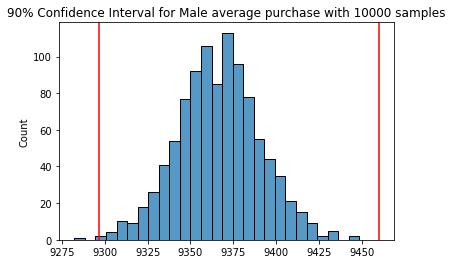

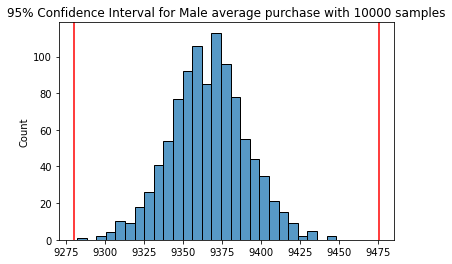

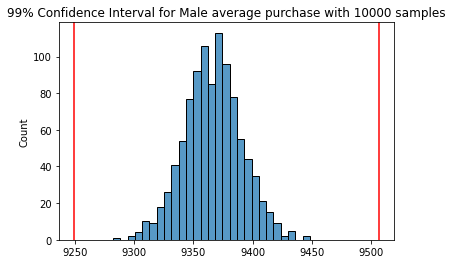

In [155]:
sns.histplot(collect_sample_means_male)
plt.axvline(lower_male_avg_10000[0], c = 'r')
plt.axvline(upper_male_avg_10000[0],c = 'r')
plt.title("90% Confidence Interval for Male average purchase with 10000 samples")
plt.show()

sns.histplot(collect_sample_means_male)
plt.axvline(lower_male_avg_10000[1], c = 'r')
plt.axvline(upper_male_avg_10000[1],c = 'r')
plt.title("95% Confidence Interval for Male average purchase with 10000 samples")
plt.show()

sns.histplot(collect_sample_means_male)
plt.axvline(lower_male_avg_10000[2], c = 'r')
plt.axvline(upper_male_avg_10000[2],c = 'r')
plt.title("99% Confidence Interval for Male average purchase with 10000 samples")
plt.show()

In [139]:
upper_male_avg_100000 = np.round(mean_male_100000 + margin_of_error_male_100000, 2)
lower_male_avg_100000 = np.round(mean_male_100000 - margin_of_error_male_100000, 2)
cnt = 0
for i in list(zip(lower_male_avg_100000, upper_male_avg_100000)):
    print("with 100000 samples, Range for", confidence_level[cnt]*100, "% confidence Interval is ", i )
    cnt += 1

with 100000 samples, Range for 90.0 % confidence Interval is  (9333.93, 9385.92)
with 100000 samples, Range for 95.0 % confidence Interval is  (9328.85, 9390.99)
with 100000 samples, Range for 99.0 % confidence Interval is  (9319.03, 9400.82)


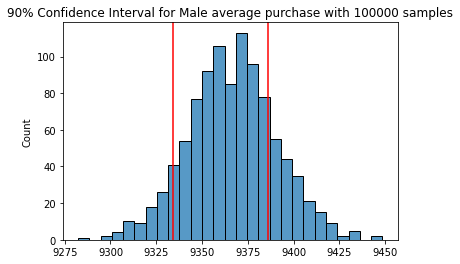

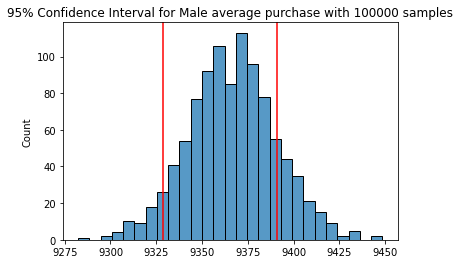

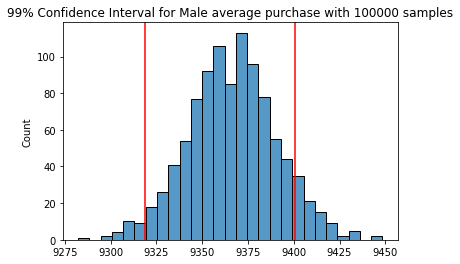

In [153]:
sns.histplot(collect_sample_means_male)
plt.axvline(lower_male_avg_100000[0], c = 'r')
plt.axvline(upper_male_avg_100000[0],c = 'r')
plt.title("90% Confidence Interval for Male average purchase with 100000 samples")
plt.show()

sns.histplot(collect_sample_means_male)
plt.axvline(lower_male_avg_100000[1], c = 'r')
plt.axvline(upper_male_avg_100000[1],c = 'r')
plt.title("95% Confidence Interval for Male average purchase with 100000 samples")
plt.show()

sns.histplot(collect_sample_means_male)
plt.axvline(lower_male_avg_100000[2], c = 'r')
plt.axvline(upper_male_avg_100000[2],c = 'r')
plt.title("99% Confidence Interval for Male average purchase with 100000 samples")
plt.show()

#### Range for spending for female  using CLT

In [156]:
female_data_100 = df_female.sample(n = 100)
female_data_1000 = df_female.sample(n = 1000)
female_data_10000 = df_female.sample(n = 10000)
female_data_100000 = df_female.sample(n = 100000)


std_female_100 = female_data_100['Purchase'].std()
std_female_1000 = female_data_1000['Purchase'].std()
std_female_10000 = female_data_10000['Purchase'].std()
std_female_100000 = female_data_100000['Purchase'].std()
print(std_female_100)
print(std_female_1000)
print(std_female_10000)
print(std_female_100000)

4825.2450443977295
4579.8603414540075
4700.987490506837
4679.348391640217


In [157]:
mean_female_100 = female_data_100["Purchase"].mean()
mean_female_1000 = female_data_1000["Purchase"].mean()
mean_female_10000 = female_data_10000["Purchase"].mean()
mean_female_100000 = female_data_100000["Purchase"].mean()
print(mean_female_100)
print(mean_female_1000)
print(mean_female_10000)
print(mean_female_100000)

9315.33
8823.218
8711.3959
8676.15488


In [158]:
margin_of_error_female_100 = z*std_female_100/np.sqrt(len(female_data_100))
margin_of_error_female_1000 = z*std_female_1000/np.sqrt(len(female_data_1000))
margin_of_error_female_10000 = z*std_female_10000/np.sqrt(len(female_data_10000))
margin_of_error_female_100000 = z*std_female_100000/np.sqrt(len(female_data_100000))
print(margin_of_error_female_100)
print(margin_of_error_female_1000)
print(margin_of_error_female_10000)
print(margin_of_error_female_100000)

[ 791.34018728  945.7480287  1244.91322145]
[237.51775673 283.86268487 373.65598315]
[ 77.09619484  92.13935481 121.28547726]
[24.26773417 29.00290181 38.17728912]


In [159]:
upper_female_avg_100 = np.round(mean_female_100 + margin_of_error_female_100, 2)
lower_female_avg_100 = np.round(mean_female_100 - margin_of_error_female_100, 2)
cnt = 0
for i in list(zip(lower_female_avg_100, upper_female_avg_100)):
    print("with 100 Female samples, Range for", confidence_level[cnt]*100, "% confidence Interval is ", i )
    cnt += 1

with 100 Female samples, Range for 90.0 % confidence Interval is  (8523.99, 10106.67)
with 100 Female samples, Range for 95.0 % confidence Interval is  (8369.58, 10261.08)
with 100 Female samples, Range for 99.0 % confidence Interval is  (8070.42, 10560.24)


In [160]:
upper_female_avg_1000 = np.round(mean_female_1000 + margin_of_error_female_1000, 2)
lower_female_avg_1000 = np.round(mean_female_1000 - margin_of_error_female_1000, 2)
cnt = 0
for i in list(zip(lower_female_avg_1000, upper_female_avg_1000)):
    print("with 1000 Female samples, Range for", confidence_level[cnt]*100, "% confidence Interval is ", i )
    cnt += 1

with 1000 Female samples, Range for 90.0 % confidence Interval is  (8585.7, 9060.74)
with 1000 Female samples, Range for 95.0 % confidence Interval is  (8539.36, 9107.08)
with 1000 Female samples, Range for 99.0 % confidence Interval is  (8449.56, 9196.87)


In [161]:
upper_female_avg_10000 = np.round(mean_female_10000 + margin_of_error_female_10000, 2)
lower_female_avg_10000 = np.round(mean_female_10000 - margin_of_error_female_10000, 2)
cnt = 0
for i in list(zip(lower_female_avg_10000, upper_female_avg_10000)):
    print("with 10000 Female samples, Range for", confidence_level[cnt]*100, "% confidence Interval is ", i )
    cnt += 1

with 10000 Female samples, Range for 90.0 % confidence Interval is  (8634.3, 8788.49)
with 10000 Female samples, Range for 95.0 % confidence Interval is  (8619.26, 8803.54)
with 10000 Female samples, Range for 99.0 % confidence Interval is  (8590.11, 8832.68)


In [162]:
upper_female_avg_100000 = np.round(mean_female_100000 + margin_of_error_female_100000, 2)
lower_female_avg_100000 = np.round(mean_female_100000 - margin_of_error_female_100000, 2)
cnt = 0
for i in list(zip(lower_female_avg_100000, upper_female_avg_100000)):
    print("with 100000 Female samples, Range for", confidence_level[cnt]*100, "% confidence Interval is ", i )
    cnt += 1

with 100000 Female samples, Range for 90.0 % confidence Interval is  (8651.89, 8700.42)
with 100000 Female samples, Range for 95.0 % confidence Interval is  (8647.15, 8705.16)
with 100000 Female samples, Range for 99.0 % confidence Interval is  (8637.98, 8714.33)


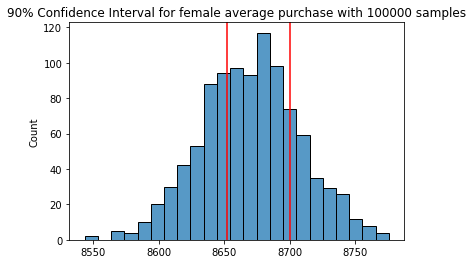

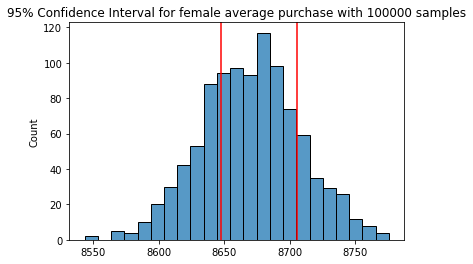

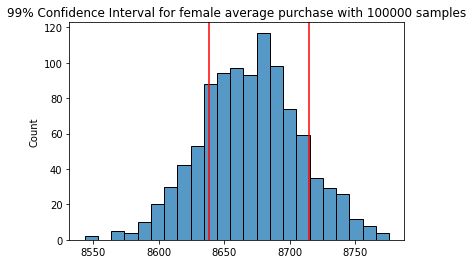

In [163]:
sns.histplot(collect_sample_means_female)
plt.axvline(lower_female_avg_100000[0], c = 'r')
plt.axvline(upper_female_avg_100000[0],c = 'r')
plt.title("90% Confidence Interval for female average purchase with 100000 samples")
plt.show()

sns.histplot(collect_sample_means_female)
plt.axvline(lower_female_avg_100000[1], c = 'r')
plt.axvline(upper_female_avg_100000[1],c = 'r')
plt.title("95% Confidence Interval for female average purchase with 100000 samples")
plt.show()

sns.histplot(collect_sample_means_female)
plt.axvline(lower_female_avg_100000[2], c = 'r')
plt.axvline(upper_female_avg_100000[2],c = 'r')
plt.title("99% Confidence Interval for female average purchase with 100000 samples")
plt.show()

**Note Worthy Points**
1) As the sample size increases, the range of Confidence interval decreases.
2) As we increase the Confidence Level, the range of Confidence Increases.
3)  As the sample size increases, the mean goes converges to population mean.
4)  As the sample size increases, the std goes converges to population std.
5)  As the sample size increases, the margin of error decreases.


### Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements?

Confidence Interval of Male and Female are not overlapping. Avg spending of male is much higher than female. Walmart can taget female by stocking  female specific product and make the store more female frendily. 

### Averge spending by Married and Unmarried

In [398]:
df_married = df[df['Marital_Status'] == 1]
df_unmarried = df[df["Marital_Status"] == 0]
print(df_married.shape)
df_unmarried.shape


(224149, 10)


(323242, 10)

In [399]:
def mean_std(data, size, category):
    data = data["Purchase"]
    mean = data.mean()
    std = data.mean()
    num_samples = size
    num_repititions = 1000
    collect_sample_means = []
    for rep in range(num_repititions):
        df_sample = data.sample(num_samples).mean()
        collect_sample_means.append(df_sample)


    print("Population mean for", category, 'is', np.mean(collect_sample_means).round(2))
    print("Population std for", category, 'is', np.std(collect_sample_means).round(2))
    sns.histplot(collect_sample_means)


Population mean for Married is 9187.31
Population std for Married is 32.2


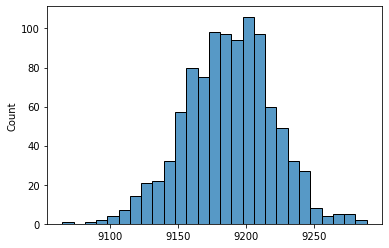

In [400]:
mean_std(df_married, 22000, "Married")

Population mean for Unmarried is 9201.86
Population std for Unmarried is 26.06


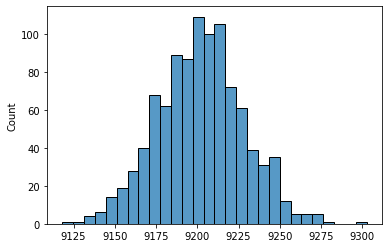

In [401]:
mean_std(df_unmarried, 32000, "Unmarried")

In [402]:
np.round((9186.34-9202.48)/9202.48,3)*100

-0.2

Unmarried Individual spend slighly higher (0.2%) than the married individual


#### Range for spending for Married  using CLT

In [403]:
confidence_level = [.90,.95,.99]
two_tail_confidence_level = confidence_level + (np.array([1,1,1])-confidence_level)/2

print(two_tail_confidence_level)
z = stats.norm.ppf(two_tail_confidence_level).round(2)
z

[0.95  0.975 0.995]


array([1.64, 1.96, 2.58])

In [404]:
def clt(data, size, category):
    random_data = data.sample(n = size)
    std = random_data['Purchase'].std().round(2)
    mean = random_data["Purchase"].mean().round(2)
    margin_of_error = np.round(z*std/np.sqrt(len(random_data)))
    print("Std for",category," with", size, " samples is",std)
    print("Mean for",category," with", size, " samples is",mean)
    print("Margin of error for",category," with", size, " samples is",margin_of_error)
    upper = np.round(mean + margin_of_error, 2)
    lower = np.round(mean - margin_of_error, 2)
    cnt = 0
    for i in list(zip(lower, upper)):
        print("With",size,category," samples, Range for", confidence_level[cnt]*100, "% confidence Interval is ", i )
        cnt += 1

In [405]:
clt(df_married, 100, "Married")

Std for Married  with 100  samples is 4678.27
Mean for Married  with 100  samples is 9758.99
Margin of error for Married  with 100  samples is [ 767.  917. 1207.]
With 100 Married  samples, Range for 90.0 % confidence Interval is  (8991.99, 10525.99)
With 100 Married  samples, Range for 95.0 % confidence Interval is  (8841.99, 10675.99)
With 100 Married  samples, Range for 99.0 % confidence Interval is  (8551.99, 10965.99)


In [406]:
clt(df_married, 1000, "Married")

Std for Married  with 1000  samples is 4909.27
Mean for Married  with 1000  samples is 9202.83
Margin of error for Married  with 1000  samples is [255. 304. 401.]
With 1000 Married  samples, Range for 90.0 % confidence Interval is  (8947.83, 9457.83)
With 1000 Married  samples, Range for 95.0 % confidence Interval is  (8898.83, 9506.83)
With 1000 Married  samples, Range for 99.0 % confidence Interval is  (8801.83, 9603.83)


In [407]:
clt(df_married, 10000, "Married")

Std for Married  with 10000  samples is 4932.1
Mean for Married  with 10000  samples is 9164.47
Margin of error for Married  with 10000  samples is [ 81.  97. 127.]
With 10000 Married  samples, Range for 90.0 % confidence Interval is  (9083.47, 9245.47)
With 10000 Married  samples, Range for 95.0 % confidence Interval is  (9067.47, 9261.47)
With 10000 Married  samples, Range for 99.0 % confidence Interval is  (9037.47, 9291.47)


In [408]:
clt(df_married, 100000, "Married")

Std for Married  with 100000  samples is 4925.42
Mean for Married  with 100000  samples is 9180.45
Margin of error for Married  with 100000  samples is [26. 31. 40.]
With 100000 Married  samples, Range for 90.0 % confidence Interval is  (9154.45, 9206.45)
With 100000 Married  samples, Range for 95.0 % confidence Interval is  (9149.45, 9211.45)
With 100000 Married  samples, Range for 99.0 % confidence Interval is  (9140.45, 9220.45)


#### Range for spending for Unmarried using CLT

In [337]:
clt(df_unmarried, 100, "Unmarried")

Std for Unmarried  with 100  samples is 4995.96
Mean for Unmarried  with 100  samples is 9467.28
Margin of error for Unmarried  with 100  samples is [ 819.  979. 1289.]
With 100 Unmarried  samples, Range for 90.0 % confidence Interval is  (8648.28, 10286.28)
With 100 Unmarried  samples, Range for 95.0 % confidence Interval is  (8488.28, 10446.28)
With 100 Unmarried  samples, Range for 99.0 % confidence Interval is  (8178.28, 10756.28)


In [338]:
clt(df_unmarried, 1000, "Unmarried")

Std for Unmarried  with 1000  samples is 4999.09
Mean for Unmarried  with 1000  samples is 9537.38
Margin of error for Unmarried  with 1000  samples is [259. 310. 408.]
With 1000 Unmarried  samples, Range for 90.0 % confidence Interval is  (9278.38, 9796.38)
With 1000 Unmarried  samples, Range for 95.0 % confidence Interval is  (9227.38, 9847.38)
With 1000 Unmarried  samples, Range for 99.0 % confidence Interval is  (9129.38, 9945.38)


In [339]:
clt(df_unmarried, 10000, "Unmarried")

Std for Unmarried  with 10000  samples is 4929.72
Mean for Unmarried  with 10000  samples is 9152.5
Margin of error for Unmarried  with 10000  samples is [ 81.  97. 127.]
With 10000 Unmarried  samples, Range for 90.0 % confidence Interval is  (9071.5, 9233.5)
With 10000 Unmarried  samples, Range for 95.0 % confidence Interval is  (9055.5, 9249.5)
With 10000 Unmarried  samples, Range for 99.0 % confidence Interval is  (9025.5, 9279.5)


In [340]:
clt(df_unmarried, 100000, "Unmarried")


Std for Unmarried  with 100000  samples is 4947.95
Mean for Unmarried  with 100000  samples is 9208.0
Margin of error for Unmarried  with 100000  samples is [26. 31. 40.]
With 100000 Unmarried  samples, Range for 90.0 % confidence Interval is  (9182.0, 9234.0)
With 100000 Unmarried  samples, Range for 95.0 % confidence Interval is  (9177.0, 9239.0)
With 100000 Unmarried  samples, Range for 99.0 % confidence Interval is  (9168.0, 9248.0)


**Note Worthy Points**
1) As the sample size increases, the range of Confidence interval decreases.
2) As we increase the Confidence Level, the range of Confidence Increases.
3)  As the sample size increases, the mean goes converges to population mean.
4)  As the sample size increases, the std goes converges to population std.
5)  As the sample size increases, the margin of error decreases.


### Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements?

Confidence Interval of Married and Unmarried are Highly overlapping. Avg spending of married and unmarried people are almost same. 
Walmart can taget both married and unmarried individual by improving the facilities of a group 

### Averge spending by different age groups

In [341]:
df_0_17 = df[df["Age"] == "0-17"]
df_18_25 = df[df["Age"] == "18-25"]
df_26_35 = df[df["Age"] == "26-35"]
df_36_45 = df[df["Age"] == "36-45"]
df_46_50 = df[df["Age"] == "46-50"]
df_46_50 = df[df["Age"] == "46-50"]
df_51_55 = df[df["Age"] == "51-55"]
df_55plus = df[df["Age"] == "55+"]

print("Shape of 0-17 Age group is ",df_0_17.shape)
print("Shape of 18_25 Age group is ",df_18_25.shape)
print("Shape of 26_35 Age group is ",df_26_35.shape)
print("Shape of 36_45 Age group is ",df_36_45.shape)
print("Shape of 46_50 Age group is ",df_46_50.shape)
print("Shape of 51_55 Age group is ",df_51_55.shape)
print("Shape of 55plus Age group is ",df_55plus.shape)

Shape of 0-17 Age group is  (15032, 10)
Shape of 18_25 Age group is  (99334, 10)
Shape of 26_35 Age group is  (218661, 10)
Shape of 36_45 Age group is  (109409, 10)
Shape of 46_50 Age group is  (45442, 10)
Shape of 51_55 Age group is  (38191, 10)
Shape of 55plus Age group is  (21322, 10)


Population mean for Age between [0-17] is 8864.15
Population std for Age between [0-17] is 57.52


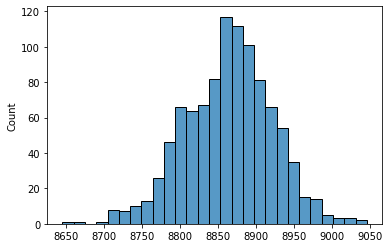

In [342]:
mean_std(df_0_17, 5000, "Age between [0-17]")

Population mean for Age between [18-25] is 9125.8
Population std for Age between [18-25] is 69.14


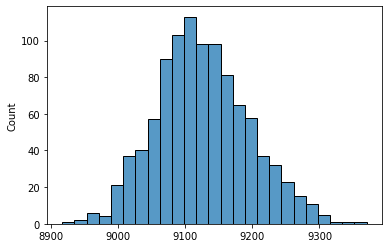

In [343]:
mean_std(df_18_25, 5000, "Age between [18-25]")

Population mean for Age between [26-35] is 9194.93
Population std for Age between [26-35] is 70.55


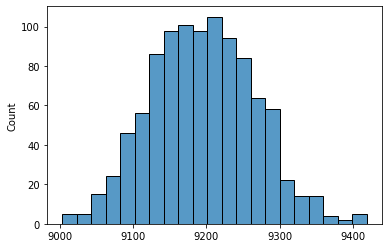

In [344]:
mean_std(df_26_35, 5000, "Age between [26-35]")

Population mean for Age between [36-45] is 9251.82
Population std for Age between [36-45] is 68.78


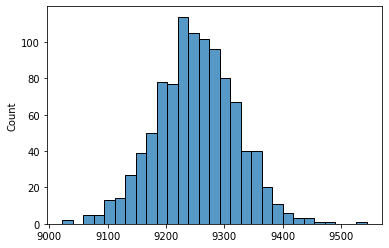

In [345]:
mean_std(df_36_45, 5000, "Age between [36-45]")

Population mean for Age between [46-50] is 9132.75
Population std for Age between [46-50] is 66.17


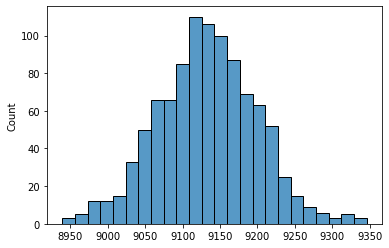

In [346]:
mean_std(df_46_50, 5000, "Age between [46-50]")


Population mean for Age between [51-55] is 9422.14
Population std for Age between [51-55] is 66.31


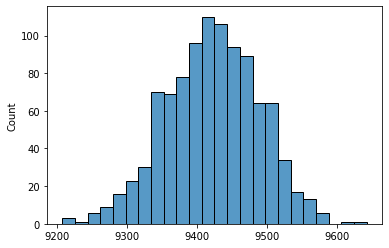

In [347]:
mean_std(df_51_55, 5000, "Age between [51-55]")

Population mean for Age Greater than 55+ is 9215.94
Population std for Age Greater than 55+ is 63.6


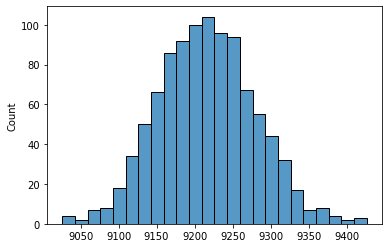

In [348]:
mean_std(df_55plus, 5000, "Age Greater than 55+")

Average spending by Age group of young individuals between 18-35 are most.


#### Range for spending for differnt Age Group using CLT

In [349]:
confidence_level = [.90,.95,.99]
two_tail_confidence_level = confidence_level + (np.array([1,1,1])-confidence_level)/2

print(two_tail_confidence_level)
z = stats.norm.ppf(two_tail_confidence_level).round(2)
z

[0.95  0.975 0.995]


array([1.64, 1.96, 2.58])

In [350]:
clt(df_0_17, 5000, "Age between [0-17]")

Std for Age between [0-17]  with 5000  samples is 5005.18
Mean for Age between [0-17]  with 5000  samples is 8869.61
Margin of error for Age between [0-17]  with 5000  samples is [116. 139. 183.]
With 5000 Age between [0-17]  samples, Range for 90.0 % confidence Interval is  (8753.61, 8985.61)
With 5000 Age between [0-17]  samples, Range for 95.0 % confidence Interval is  (8730.61, 9008.61)
With 5000 Age between [0-17]  samples, Range for 99.0 % confidence Interval is  (8686.61, 9052.61)


In [351]:
clt(df_18_25, 5000, "Age between [18-25]")

Std for Age between [18-25]  with 5000  samples is 4986.12
Mean for Age between [18-25]  with 5000  samples is 9157.44
Margin of error for Age between [18-25]  with 5000  samples is [116. 138. 182.]
With 5000 Age between [18-25]  samples, Range for 90.0 % confidence Interval is  (9041.44, 9273.44)
With 5000 Age between [18-25]  samples, Range for 95.0 % confidence Interval is  (9019.44, 9295.44)
With 5000 Age between [18-25]  samples, Range for 99.0 % confidence Interval is  (8975.44, 9339.44)


In [352]:
clt(df_26_35, 5000, "Age between [26-35]")

Std for Age between [26-35]  with 5000  samples is 4950.87
Mean for Age between [26-35]  with 5000  samples is 9203.76
Margin of error for Age between [26-35]  with 5000  samples is [115. 137. 181.]
With 5000 Age between [26-35]  samples, Range for 90.0 % confidence Interval is  (9088.76, 9318.76)
With 5000 Age between [26-35]  samples, Range for 95.0 % confidence Interval is  (9066.76, 9340.76)
With 5000 Age between [26-35]  samples, Range for 99.0 % confidence Interval is  (9022.76, 9384.76)


In [353]:
clt(df_36_45, 5000, "Age between [36-45]")

Std for Age between [36-45]  with 5000  samples is 4937.36
Mean for Age between [36-45]  with 5000  samples is 9137.05
Margin of error for Age between [36-45]  with 5000  samples is [115. 137. 180.]
With 5000 Age between [36-45]  samples, Range for 90.0 % confidence Interval is  (9022.05, 9252.05)
With 5000 Age between [36-45]  samples, Range for 95.0 % confidence Interval is  (9000.05, 9274.05)
With 5000 Age between [36-45]  samples, Range for 99.0 % confidence Interval is  (8957.05, 9317.05)


In [354]:
clt(df_46_50, 5000, "Age between [46-50]")

Std for Age between [46-50]  with 5000  samples is 4858.29
Mean for Age between [46-50]  with 5000  samples is 9133.92
Margin of error for Age between [46-50]  with 5000  samples is [113. 135. 177.]
With 5000 Age between [46-50]  samples, Range for 90.0 % confidence Interval is  (9020.92, 9246.92)
With 5000 Age between [46-50]  samples, Range for 95.0 % confidence Interval is  (8998.92, 9268.92)
With 5000 Age between [46-50]  samples, Range for 99.0 % confidence Interval is  (8956.92, 9310.92)


In [355]:
clt(df_51_55, 5000, "Age between [51-55]")

Std for Age between [51-55]  with 5000  samples is 4968.85
Mean for Age between [51-55]  with 5000  samples is 9435.54
Margin of error for Age between [51-55]  with 5000  samples is [115. 138. 181.]
With 5000 Age between [51-55]  samples, Range for 90.0 % confidence Interval is  (9320.54, 9550.54)
With 5000 Age between [51-55]  samples, Range for 95.0 % confidence Interval is  (9297.54, 9573.54)
With 5000 Age between [51-55]  samples, Range for 99.0 % confidence Interval is  (9254.54, 9616.54)


In [356]:
clt(df_55plus, 5000, "Age greater than [55+]")

Std for Age greater than [55+]  with 5000  samples is 4771.66
Mean for Age greater than [55+]  with 5000  samples is 9231.43
Margin of error for Age greater than [55+]  with 5000  samples is [111. 132. 174.]
With 5000 Age greater than [55+]  samples, Range for 90.0 % confidence Interval is  (9120.43, 9342.43)
With 5000 Age greater than [55+]  samples, Range for 95.0 % confidence Interval is  (9099.43, 9363.43)
With 5000 Age greater than [55+]  samples, Range for 99.0 % confidence Interval is  (9057.43, 9405.43)


### Are confidence intervals of different age group spending overlapping? How can Walmart leverage this conclusion to make changes or improvements?
Confidence Interval of different age group are overlapping. Avg spending of young earning individual between 18-35 are the most. Walmart can taget young by stocking  product that attract these group of peoples.

# Insights & Recommendations

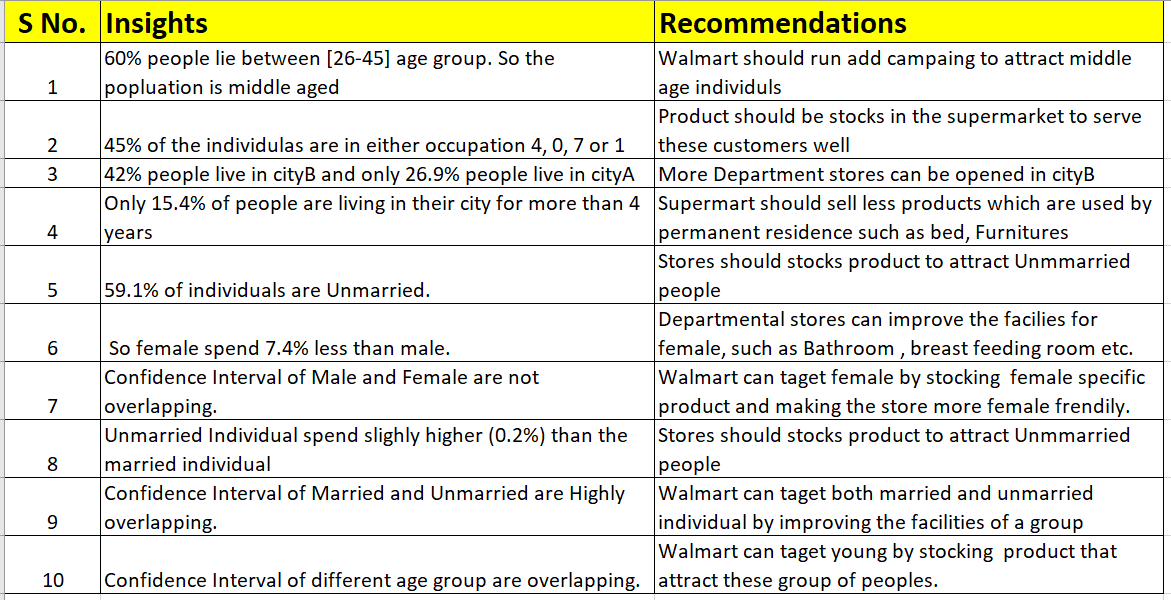